In [1]:
# import sys, os, math, random
# import numpy as np
# import matplotlib.pyplot as plt
# import torch
# from torch import nn
# from torch.nn import functional as F
# # from torch.utils.data import DataLoader
# # from torchvision import datasets
# # from torchvision.transforms import ToTensor
# import torchvision.models as models
# print('python dir:', sys.executable)
# print('is torch gpu ok:', torch.cuda.is_available())
# print('torch version:',torch.__version__)

python dir: D:\anaconda3\envs\torch\python.exe
is torch gpu ok: True
torch version: 2.0.0


In [1]:
import py_mydata_RNN as mdata
import py_mymodel_RNN as mmodel
import py_mypipline_RNN as mpipl
from d2l import torch as d2l
import matplotlib.pyplot as plt

## 数据

In [2]:
token_type = 'word'
batch_size, num_steps = 32, 32
train_iter, vocab = mdata.load_data_time_machine(batch_size, num_steps, max_tokens=-1, token_type=token_type)
# print('data sets len:', len(train_iter.corpus))
# # train_iter.vocab._token_freqs
# print('token:', len(vocab))
print(vocab.token_freqs[:10])
# print(vocab.token_freqs[-10:])

[('the', 2261), ('i', 1267), ('and', 1245), ('of', 1155), ('a', 816), ('to', 695), ('was', 552), ('in', 541), ('that', 443), ('my', 440)]


In [ ]:
dim_emb, dim_hiddens = 256, 256
# net = mmodel.RNNModelScratch(batch_size, len(vocab), dim_emb, dim_hiddens, d2l.try_gpu())
device = d2l.try_gpu()
net = mmodel.RNNModelSimple(batch_size,len(vocab), dim_hiddens, device)
net.to(device)
num_epochs, lr = 500, 1
tmp_loss, speed = mpipl.train_my(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu(), token_type=token_type)
name_prefix = "tt-{}_bs{:03d}_nsteps{:03d}_dh{:03d}".format(token_type, batch_size, num_steps, dim_hiddens)
model_type = 'LSTM'
print("{}_{} loss:{:.1f}".format(name_prefix, model_type, tmp_loss), "speed:{:.0f}".format(speed))
# tt-word_bs032_nsteps032_dh256_GRU loss:1.1 speed:67508
# time traveller with us enough to let me it was all right on a pair like pinkish here and i had been
# traveller  not   i   the time traveller for because it will be convenient to speak of him

# tt-word_bs032_nsteps032_dh256_LSTM loss:1.7 speed:67530
# time traveller began to his own look  and it was in the same dinner under the little hopeless lay up to
# traveller s little faces it was a jest and set him into my head then i walked of the little machine

# tt-word_bs032_nsteps032_dh256_LSTM loss:1.6 speed:22159 on macmini m4
# time traveller came said i had a certain sense of three direction but for the more in the little sky we had
# traveller i went up and he looked down the others sunset of my mind was the knees of the day

epo:1/500 loss:2170.1 20753 tokens/sec time traveller the the the the the the the the the the the the the the the the the the the the
epo:51/500 loss:384.9 21729 tokens/sec time traveller of the time of the time of the time of the time of the time of the time of the
epo:101/500 loss:206.4 21844 tokens/sec time traveller and the same of the time traveller and the same of the sky and the sky of the sky and
epo:151/500 loss:87.1 21662 tokens/sec time traveller and the same of the time traveller came to the time machine i saw a certain sense of the machine
epo:201/500 loss:31.6 22043 tokens/sec time traveller and the time traveller and the lamp of the fire man and now one down and passed and the other
epo:251/500 loss:12.8 22473 tokens/sec time traveller came said the time traveller he have been the lamp time he turned of the laboratory and he and he
epo:301/500 loss:6.0 22271 tokens/sec time traveller came said i had seen with such a little of it was in his hand to the ground and the
epo:

In [19]:
# freqs = [freq for token, freq in vocab.token_freqs]
# d2l.plot(freqs,b  xlabel='token: x', ylabel='frequency: n(x)', xscale='linear', yscale='log')

In [4]:
prefix = ['time', 'i think', 'my', 'but i felt', 'a little dance']
# predict_res = []
for p in prefix:
    print(mpipl.predict_my(p, 32, net, vocab, token_type=token_type))

# time i began to go from the room i had seen then the well he was full then he travelled they were to be away away for his way that we were back
# i think that was as it be very thing to recover a little hand so it seemed to me and at first but i made me and then something her great bars i had
# my feet i began to the machine of my head i fancied i heard in a small sweat i had a persuasion into the ground and it seemed to me then an an
# but i felt assured of the hill that had had long to think at any and was thick by way and then should found the new of the glare fishes  they seemed they would
# a little dance i seemed to think the same at my last above and a the pattering came as to the ground then the sun came a a hazy upon upon and then there seemed

time i went to the laboratory about a doubt i could not had time in their hand from a evening perhaps as to be it came too by one i was at first
i think i was so in the palace of a long and from my pocket i thought i see so it was so far a haze of a kind helpless at me in the
my eyes i had seen the laboratory as touched a thing on of my men i thought i saw a sun got from it as to be one one little thing i had
but i felt breathing of my impression was in only and i must with some more creatures when it seemed to feel that i struck her of them had been my bed when had no
a little dance as i could not said the provincial from the horrible sphinx and the little lawn i was that i was so to my comfort but though as it was the nearer point


困惑度 13.1, 96695.5 词元/秒 cuda:0
time traveller came to a far and two to a thick way the sea of the hail i had seen in the
traveller  i looked up and so i did with the machine was a queer perhaps i stooped it in a


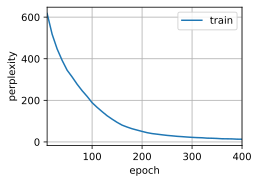

In [20]:
dim_emb, dim_hiddens = 256, 256
# net = mmodel.RNNModelScratch(batch_size, len(vocab), dim_emb, dim_hiddens, d2l.try_gpu())
device = d2l.try_gpu()
net = mmodel.RNNModelSimple(batch_size,len(vocab), dim_hiddens, device)
net.to(device)
num_epochs, lr = 400, 0.8
mpipl.train_my(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu(), token_type=token_type)


# token_type='word' epoch=400 emb=256 hidden=256 batch=32 seqlen=32
# 困惑度 11.9, 75766.7 词元/秒 cuda:0
# time traveller  i have told it   i stood it at last time i could not seen the time machine
# traveller and it was the time machine but i tried to the welcome of the morning in which of the upper

# token_type='word' epoch=300 emb=256 hidden=256 batch=32 seqlen=16
# 困惑度 8.5, 102040.1 词元/秒 cuda:0
# time traveller put to us its refined had said the medical man are and i had a weary thing and the red
# traveller  then

# token_type='word' epoch=500 emb=256 hidden=256 batch=32 seqlen=16
# 困惑度 2.1, 48268.6 词元/秒 cuda:0
# time traveller was a jest trick i tried to a little beautiful articulation i carefully i heard the breathing of a crowd
# traveller had been the favoured pursuing from which most man seemed to watch me i determined to make them arms and

# token_type='char' epoch=500 emb=256 hidden=256 batch=32 seqlen=16
# 困惑度 3.4, 61033.3 词元/秒 cuda:0
# time traveller and the sun at the 
# traveller and the sun at the 

In [12]:
prefix = 'time'
predict_res = mpipl.predict_my(prefix, 100, net, vocab, token_type=token_type)
print(predict_res)

time traveller put to us its refined had said the medical man are and i had a weary thing and the red of a long river valley but i felt a queer of matches was in rich and i began to her i came to the descent of the wood i saw a little pattering of the ground i saw no agonized  but i felt to look the morlocks of the hill i think my feet and the shoulder of plates i had a vague thing to strike a little dance and yet the editor of it was a brown


## pipline

In [ ]:
token_type = 'word'
# res_dict = dict()
for batch_size in [8]:  # 32 64
    for num_steps in [8]: # 16 32
        for dim_hiddens in [32, 64]: # 64, 128, 256, 512
            name_prefix = "tt-{}_bs{:03d}_nsteps{:03d}_dh{:03d}".format(token_type, batch_size, num_steps, dim_hiddens)
            print("\n*********** batch_size={}, num_steps={}, dim_hiddens={} **************".format(batch_size, num_steps, dim_hiddens))
            token_type = 'word'
            train_iter, vocab = mdata.load_data_time_machine(batch_size, num_steps, max_tokens=-1, token_type=token_type)
            device = d2l.try_gpu()
            net = mmodel.RNNModelSimple(batch_size,len(vocab), dim_hiddens, device)
            net.to(device)
            num_epochs, lr = 500, 0.9
            tmp_loss, speed = mpipl.train_my(net, train_iter, vocab, lr, num_epochs, d2l.try_gpu(), token_type=token_type)
            prefix = ['time', 'i think', 'my', 'but i felt', 'a little dance']
            predict_res = []
            for p in prefix:
                predict_res.append(mpipl.predict_my(p, 32, net, vocab, token_type=token_type))
            res_dict[name_prefix]=("{:.1f}".format(tmp_loss), "{:.0f}".format(speed), predict_res)

print('\n************final res*****************\n')
for k,v in res_dict.items():
    print(k, v[0],v[1])
    for line in v[2]:
        print(line)
    print('\n')

In [ ]:
for k,v in res_dict.items():
    print(k, v[0],v[1])
    # for line in v[2]:
    #     print(line)
    # print('\n')

# on gpu 1660super
# tt-word_bs032_nsteps016_dh064 12.9 200787
# tt-word_bs032_nsteps016_dh128 6.8 144985
# tt-word_bs032_nsteps016_dh256 4.6 105560
# tt-word_bs032_nsteps016_dh512 9.1 71494
# tt-word_bs064_nsteps016_dh064 33.9 225645
# tt-word_bs064_nsteps016_dh128 12.2 185021
# tt-word_bs064_nsteps016_dh256 5.4 120308
# tt-word_bs064_nsteps016_dh512 2.0 75515
# tt-word_bs128_nsteps016_dh064 87.7 314358
# tt-word_bs128_nsteps016_dh128 36.1 249735
# tt-word_bs128_nsteps016_dh256 10.9 147256
# tt-word_bs128_nsteps016_dh512 2.2 93863
# tt-word_bs064_nsteps032_dh256 7.8 155805
# tt-word_bs064_nsteps032_dh512 2.0 99855

tt-word_bs032_nsteps016_dh064 12.9 200787
tt-word_bs032_nsteps016_dh128 6.8 144985
tt-word_bs032_nsteps016_dh256 4.6 105560
tt-word_bs032_nsteps016_dh512 9.1 71494
tt-word_bs064_nsteps016_dh064 33.9 225645
tt-word_bs064_nsteps016_dh128 12.2 185021
tt-word_bs064_nsteps016_dh256 5.4 120308
tt-word_bs064_nsteps016_dh512 2.0 75515
tt-word_bs128_nsteps016_dh064 87.7 314358
tt-word_bs128_nsteps016_dh128 36.1 249735
tt-word_bs128_nsteps016_dh256 10.9 147256
tt-word_bs128_nsteps016_dh512 2.2 93863
tt-word_bs064_nsteps032_dh256 7.8 155805
tt-word_bs064_nsteps032_dh512 2.0 99855
